In [1]:
from util import *
%load_ext autoreload

In [ ]:
%autoreload

# Gaussian Clusters Example

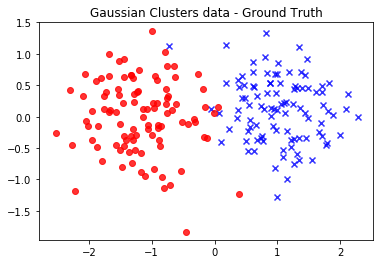

In [6]:
# Problem Setup --- Need to rework this example to be more general. I've made it so that the clusters are 
# in consecutive order for plotting m (0-99, 100-199). For this I had to re write the helper functions when 
# doing the Two moons dataset.

Ns = [100,100]
N = sum(Ns)
fs = 5
means = [np.array([1.0,0.]), np.array([-1.0,0.])]
Covs = [0.3*np.eye(2), 0.3*np.eye(2)]

# define fidelity and ground truth 
fid_orig = {}
fid_orig[1] = list(range(fs))
fid_orig[-1] = [Ns[0] + i for i in range(fs)]
ground_truth = np.array([1. if i<Ns[0] else -1. for i in range(N)])


# Graph computations
X, W = generate_data_graphs(Ns, means, Covs)
w,v = get_eig_Lnorm(W)

# Model Setup
tau, alpha, gamma = 0.001, 1.0, 0.0001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 20


# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.8)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.8)
plt.axis('equal')
plt.title('Gaussian Clusters data - Ground Truth')
plt.show()

calc_orig took 0.003052 seconds
Iter = 0


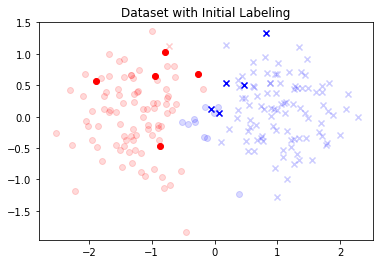

Iter = 1


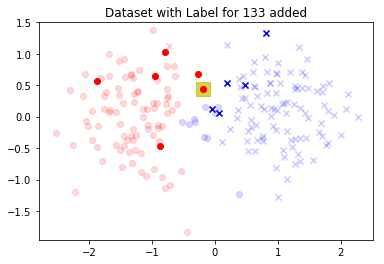

Iter = 2


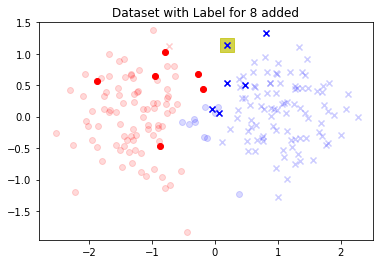

Iter = 3


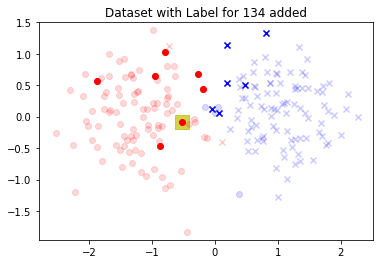

Iter = 4


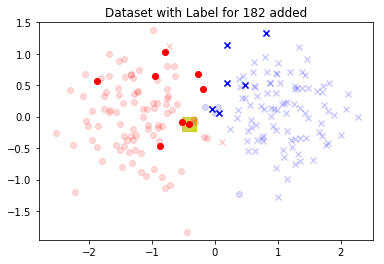

Iter = 5


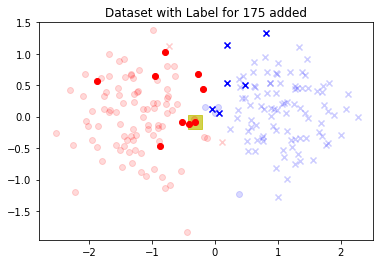

Iter = 6


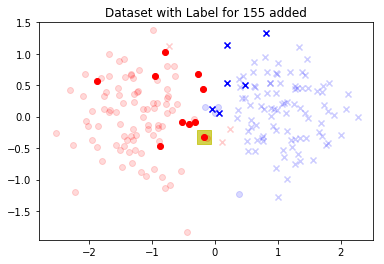

Iter = 7


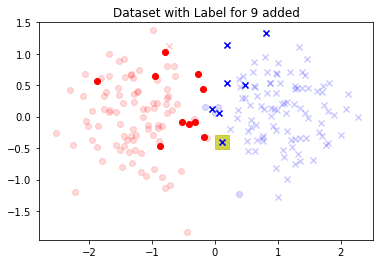

Iter = 8


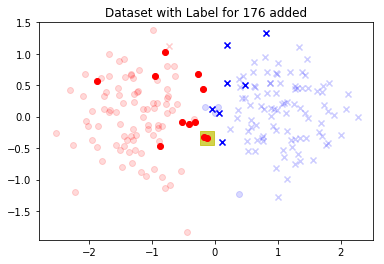

Iter = 9


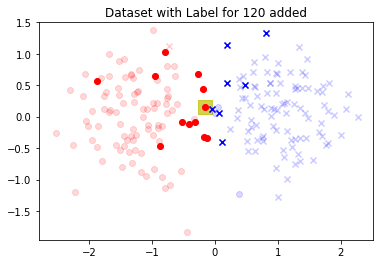

Iter = 10


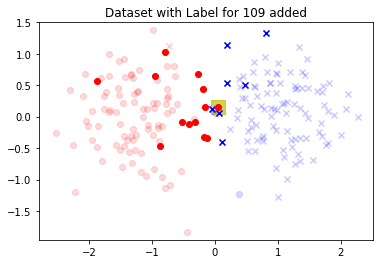

Iter = 11


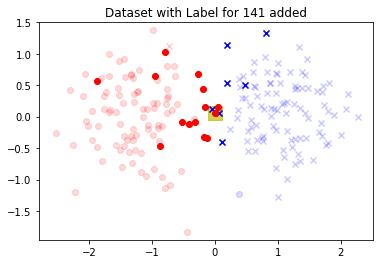

Iter = 12


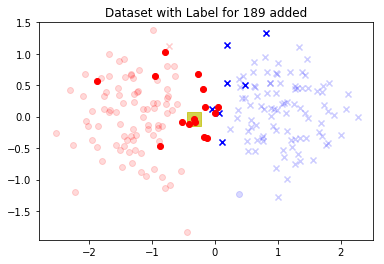

Iter = 13


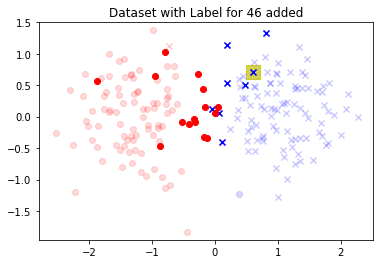

Iter = 14


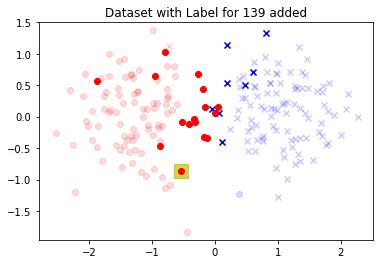

Iter = 15


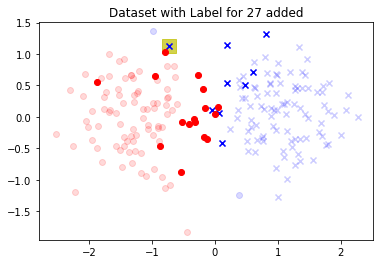

Iter = 16


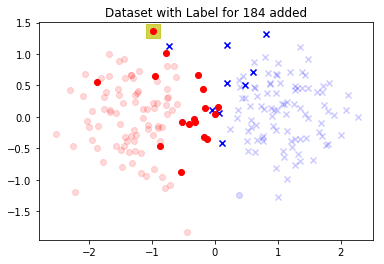

Iter = 17


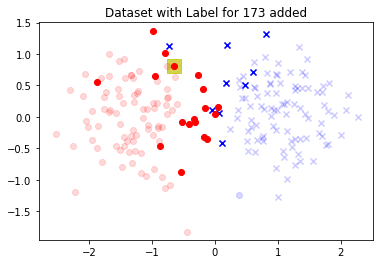

Iter = 18


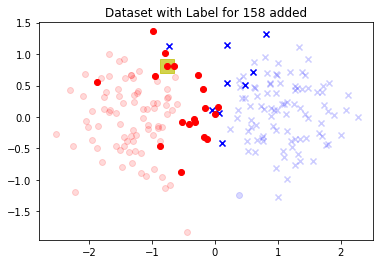

Iter = 19


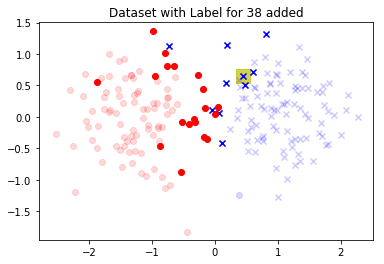

Iter = 20


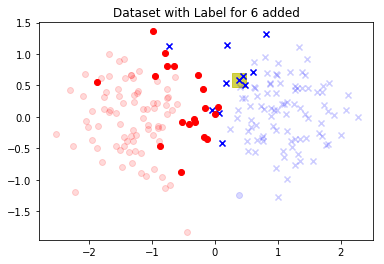

[(-1, 0.055), (133, 0.055), (8, 0.055), (134, 0.03), (182, 0.03), (175, 0.03), (155, 0.035), (9, 0.025), (176, 0.025), (120, 0.02), (109, 0.015), (141, 0.01), (189, 0.01), (46, 0.01), (139, 0.01), (27, 0.01), (184, 0.005), (173, 0.005), (158, 0.005), (38, 0.005), (6, 0.005)]


In [7]:
# Active Learning
fid = copy.deepcopy(fid_orig)
tag2 = (tau, alpha, gamma2)
test_opts = (num_iters, True)
ERRS, M = run_test_AL(X, v, w, fid, ground_truth, tag2, test_opts)

if verbose:
    print(ERRS)

## Compare to Random Sampling

In [8]:
fid = copy.deepcopy(fid_orig)
tag2 = (tau, alpha, gamma2)
test_opts = (num_iters, False)
ERRS_rand, M_rand = run_test_rand(X, v, w, fid, ground_truth, tag2, test_opts)

if verbose:
    print(ERRS_rand)

[(-1, 0.055), (66, 0.055), (160, 0.055), (95, 0.055), (40, 0.055), (131, 0.055), (65, 0.055), (84, 0.055), (175, 0.025), (33, 0.025), (52, 0.025), (125, 0.025), (42, 0.025), (77, 0.025), (174, 0.025), (26, 0.025), (139, 0.025), (117, 0.025), (47, 0.025), (10, 0.025), (96, 0.025)]


## Convergence Comparison

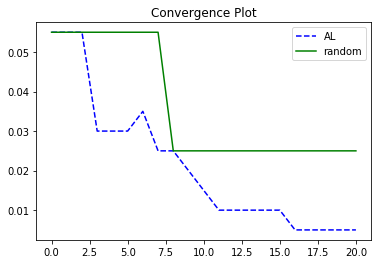

In [9]:
ids_al, errs = zip(*ERRS)
ids_rand, errs_rand = zip(*ERRS_rand)
plt.plot(range(num_iters+1), errs, 'b--', label='AL')
plt.plot(range(num_iters+1), errs_rand, 'g', label='random')
plt.title('Convergence Plot')
plt.legend()
plt.show()

# Analyzing solution $\mathbf{m}$

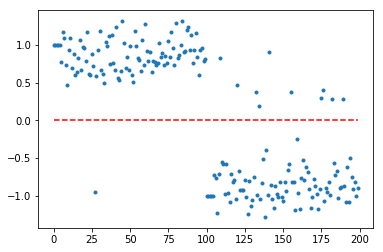

In [10]:
m = M[0]

lin = [i for i in range(N)]
plt.scatter(lin, list(m), marker='.')
plt.plot(lin, N*[0.], 'r--', linewidth=1.5)
plt.show()

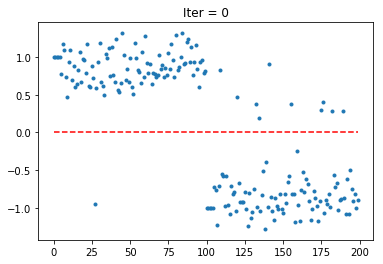

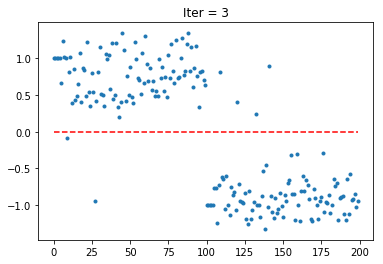

In [11]:
for l in range(5):
    if l % 3 == 0:
        m = list(M[l])
        lin = [i for i in range(N)]
        plt.scatter(lin, m, marker='.')
        plt.plot(lin, N*[0.], 'r--', linewidth=1.5)
        plt.title('Iter = %d' % l)
        plt.show()

In [12]:
m = M[0]
m_new = m.copy()
m_new[m_new > 1.] = 1.
m_new[m_new < -1.] = -1.


In [13]:
def E(x):
    vTx = v.T.dot(x.T)
    wvTx = np.diag(w).dot(vTx)
    val = vTx.T.dot(wvTx)
    return  val + (1./gamma**2)*np.linalg.norm(B.dot(x.T).flatten() - y)**2.

In [14]:
B_diag = np.zeros(N)
labeled = set()
for k in fid_orig.keys():
    labeled = labeled.union(set(fid_orig[k]))
labeled = list(labeled)
unlabeled = list(set([i for i in range(N)]) - set(labeled))
B_diag[labeled] = 1.
B = sp.sparse.diags(B_diag, format='lil')
m, C, y = calc_orig(v, w, B, fid, labeled, unlabeled, tau, alpha, gamma2)

E_m = E(m)
E_m_new = E(m_new)

In [15]:
print(E_m, E_m_new)

5387.978826968157 3003.609174150905


# 2 Moons Example


Functions in this section are defined in the ``util.py`` helper file with names like ``*2``, ``*2AL``, etc.

In [16]:
from sklearn.datasets import make_moons

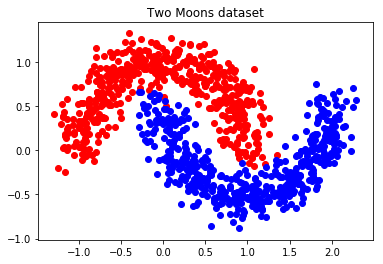

In [17]:
# Setup
N = 1000
data = make_moons(N, noise=0.15)

X, ground_truth = data
X1, X2 = X[ground_truth == 0,:], X[ground_truth == 1,:] 
ground_truth[np.where(ground_truth == 0)] = -1

#plt.rcParams['figure.figsize'] =(6,6)
plt.scatter(X1[:,0], X1[:,1], c='r')
plt.scatter(X2[:,0], X2[:,1], c='b')
plt.title('Two Moons dataset')
plt.show()



# Define the labeled and unlabed indices
sup_percent = 0.1
indices = np.array(list(range(N)))
labeled_orig = set()
fid_orig = {}
gt_flipped = {}
for i in [-1,1]:
    i_mask = indices[ground_truth ==i]
    gt_flipped[i] = i_mask
    np.random.shuffle(i_mask)
    n_i = len(i_mask)
    fid_orig[i] = list(i_mask[:int(sup_percent*n_i)])
    labeled_orig = labeled_orig.union(set(fid_orig[i]))
unlabeled_orig = sorted(list(set(indices) - labeled_orig))
labeled_orig = sorted(list(labeled_orig))


# Graph Generation and Eigen-Calculation
W = make_sim_graph(X)
w,v = get_eig_Lnorm(W)


# Model Setup
tau, alpha, gamma = 0.001, 1.0, 0.0001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 5

calc_orig took 0.119970 seconds
Iter = 0


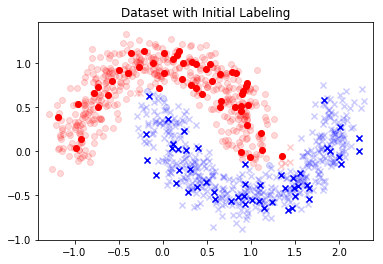

Iter = 1


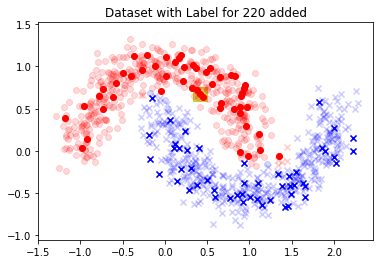

Iter = 2


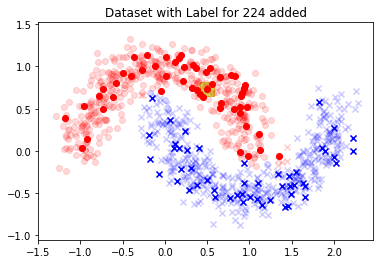

Iter = 3


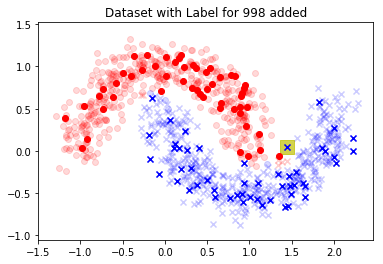

Iter = 4


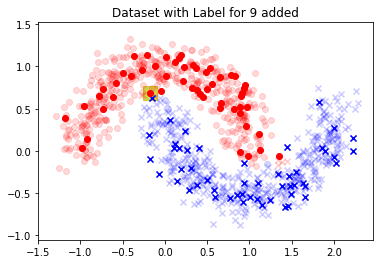

Iter = 5


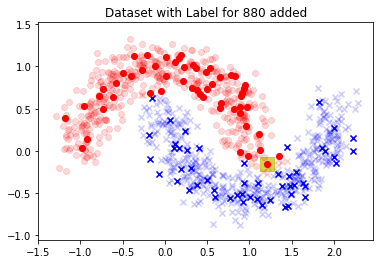

[(-1, 0.011), (220, 0.011), (224, 0.011), (998, 0.01), (9, 0.01), (880, 0.012)]


In [18]:
# Active Learning Choices -- EEM 
fid = copy.deepcopy(fid_orig)
tag2 = (tau, alpha, gamma2)
test_opts = (num_iters, verbose)
ERRS, M = run_test_AL(X, v, w, fid, ground_truth, tag2, test_opts)

if verbose:
    print(ERRS)

Iter = 0


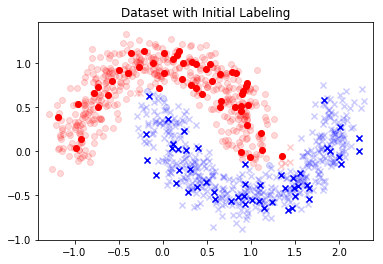

Iter = 1


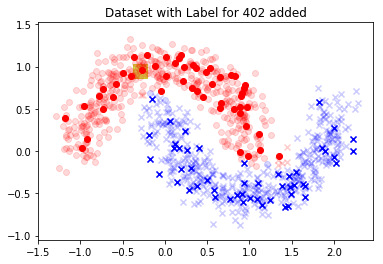

Iter = 2


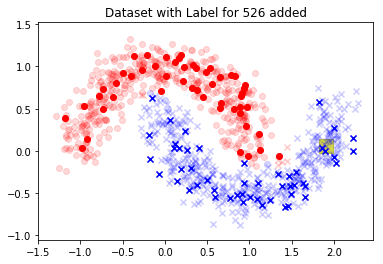

Iter = 3


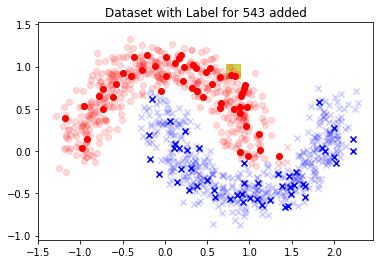

Iter = 4


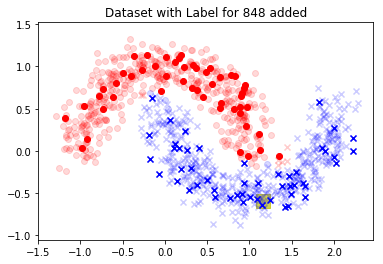

Iter = 5


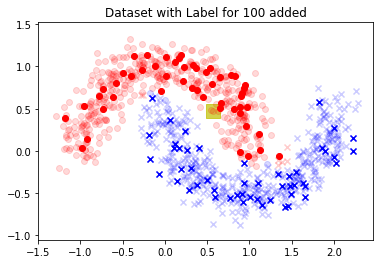

[(-1, 0.011), (402, 0.011), (526, 0.011), (543, 0.011), (848, 0.011), (100, 0.011)]


In [19]:
# Random choice
labeled = labeled_orig.copy()
unlabeled = unlabeled_orig.copy()
fid = copy.deepcopy(fid_orig)

ERRS_rand, M_rand = run_test_rand(X, v, w, fid, ground_truth, tag2, test_opts)
if verbose:
    print(ERRS_rand)

## Error Plotting - 2 Moons 

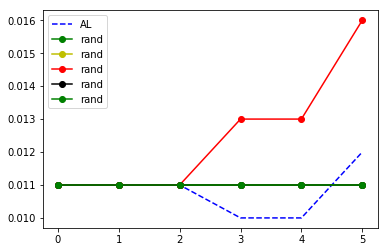

In [20]:
colors = ['y', 'r', 'k', 'g']
ids, errs = zip(*ERRS)
ids_rand, errs_rand = zip(*ERRS_rand)
plt.figure()
plt.plot([i for i in range(num_iters+1)], errs, 'b--', label='AL')
plt.plot([i for i in range(num_iters+1)], errs_rand, 'g-o', label='rand')
test_opts = (num_iters, False)
for i in range(4):
    labeled = labeled_orig.copy()
    unlabeled = unlabeled_orig.copy()
    fid = copy.deepcopy(fid_orig)

    ERRS_rand, M_rand = run_test_rand(X, v, w, fid, ground_truth, tag2, test_opts)
    ids_rand, errs_rand = zip(*ERRS_rand)
    plt.plot([i for i in range(num_iters+1)], errs_rand,'%so-'%colors[i], label='rand')
plt.legend()


# Faster Approximations

We can calculate $\mathbf{m}|_u$ faster with using the derivation given in Rasmussen's Gaussian Process book. 

$$
    \mathbf{m}_u = C_\tau^{u \ell} \left( \gamma^2 I  + C_\tau^{\ell \ell}\right)^{-1}\mathbf{y}
$$

Where $C_\tau^{u \ell}, C_\tau^{\ell \ell}$ are the submatrices of $C_\tau = \tau^{2\alpha}(L + \tau^2 I)^{-alpha}$ corresponding to the ``unlabeled`` ($u$) and ``labeled`` ($\ell$) indices.

Could also do the matrix multiplication

$$ 
    \mathbf{m} = \begin{bmatrix}
                C_\tau^{\ell \ell} \\
                C_\tau^{u \ell} \\
                \end{bmatrix} \left( \gamma^2 I  + C_\tau^{\ell \ell}\right)^{-1}\mathbf{y}.
$$
to obtain $\mathbf{m}$ on all the indices.


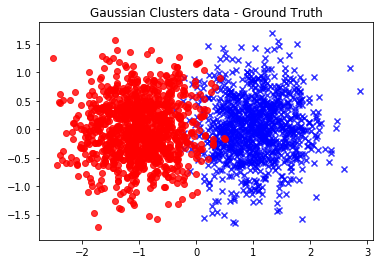

In [21]:
# Problem Setup --- Need to rework this example to be more general. I've made it so that the clusters are 
# in consecutive order for plotting m (0-99, 100-199). For this I had to re write the helper functions when 
# doing the Two moons dataset.

Ns = [1000,1000]
N = sum(Ns)
fs = 50
means = [np.array([1.0,0.]), np.array([-1.0,0.])]
Covs = [0.3*np.eye(2), 0.3*np.eye(2)]

# define fidelity and ground truth 
fid_orig = {}
fid_orig[1] = list(range(fs))
fid_orig[-1] = [Ns[0] + i for i in range(fs)]
ground_truth = np.array([1. if i<Ns[0] else -1. for i in range(N)])


# Graph computations
X, W = generate_data_graphs(Ns, means, Covs)
w,v = get_eig_Lnorm(W)

# Model Setup
tau, alpha, gamma = 0.001, 1.0, 0.001
gamma2 = gamma**2.
verbose = True     # set to True if want to see visual of which points chosen
num_iters = 20


# Plot the data set
plt.rcParams['figure.figsize'] = (6,4)
plt.scatter(X[:Ns[0],0], X[:Ns[0],1], marker='x', c='b', alpha=0.8)
plt.scatter(X[Ns[0]:,0], X[Ns[0]:,1], marker='o', c='r',alpha=0.8)
plt.axis('equal')
plt.title('Gaussian Clusters data - Ground Truth')
plt.show()

In [22]:
# Other Approximation for finding m restricted to the unlabeled set
labeled = set()
indices = np.array(list(range(N)))
for k in fid.keys():
    k_mask = indices[ground_truth ==k]
    gt_flipped[k] = k_mask
    labeled = labeled.union(set(fid[k]))
unlabeled = sorted(list(set(indices) - labeled))
labeled = sorted(list(labeled)) 

# Initial solution - find m and C, keep track of y
B_diag = np.zeros(N)
B_diag[labeled] = 1.
B = sp.sparse.diags(B_diag, format='lil')

m, C, y = calc_orig(v, w, B, fid, labeled, unlabeled, tau, alpha, gamma2)
N_prime= len(labeled)

In [23]:
# only m_u
tic = time.clock()
w_inv = (tau ** (2 * alpha)) * np.power(w + tau**2., -alpha)     # diagonalization of C_t,e
v_lab = v[labeled,:]   # get the rows of v corresponding to labeled points
w_inv_v_lab = (v_lab*w_inv).T
C_ul = v[unlabeled,:].dot(w_inv_v_lab)
A = v_lab.dot(w_inv_v_lab)
A[np.diag_indices(N_prime)] += gamma2
A_inv = sla.inv(A)
m_u = C_ul.dot(A_inv.dot(y[labeled]))
toc = time.clock()
print(toc - tic)

0.0656669999999977


In [24]:
print(np.allclose(m_u, m[unlabeled]))

True


In [25]:
# all of m
tic = time.clock()
w_inv = (tau ** (2 * alpha)) * np.power(w + tau**2., -alpha)     # diagonalization of C_t,e
v_lab = v[labeled,:]   # get the rows of v corresponding to labeled points
#v_unlab = v[unlabeled,:]
w_inv_v_lab = (v_lab*w_inv).T
C_all_l = v.dot(w_inv_v_lab)
A = v_lab.dot(w_inv_v_lab)
A[np.diag_indices(N_prime)] += gamma2
A_inv = sla.inv(A)
m_all = C_all_l.dot(A_inv.dot(y[labeled]))
toc = time.clock()
print(toc - tic)

0.04626800000000131


In [26]:
print(np.allclose(m, m_all))

True


In [27]:
# the calculation in the code currently (old)
tic = time.clock()
d = (tau ** (2 * alpha)) * np.power(w + tau**2., -alpha)     # diagonalization of C_t,e
# prior_inv : C_{tau,eps}^{-1}, where
# C_{tau, eps}^{-1} = tau^{-2alpha}(L + tau^2 I)^alpha
prior_inv = v.dot(sp.sparse.diags([1./thing for thing in d], format='lil').dot(v.T))
# B/gamma^2
B_over_gamma2 = B / (gamma2)
# post_inv  : (B/gamma^2 + C_{tau,\eps}^{-1})^{-1}
post_inv  = prior_inv + B_over_gamma2
C = post_inv.I
m_comp = (1./gamma2)*C.dot(y).flatten()
toc = time.clock()
print(toc - tic)

1.2420769999999983


In [28]:
print(np.allclose(m_comp, m_all)) # check that it still calculates correctly...

True


## Observations 

This seems to scale much better than previous calculation. Now, we look to calculating $C$ as well, since that is needed for our sampling and future updating with t


Calculating $C$ then is found by just applying Woodbury identity on our normal expression for $C$:
$$
\begin{align}
    C &= \left(C_\tau^{-1} + \frac{1}{\gamma^2}B\right)^{-1} \\
    &= C_\tau - C_\tau H^T \left(\gamma^2 I + H C_\tau H^T \right)^{-1}HC_\tau \\
    &= C_\tau - C_\tau^{:,\ell}\left(\gamma^2 I + H C_\tau H^T \right)^{-1}C_\tau^{\ell, :} \\
\end{align}
$$

This is a little more costly than just the update to $\mathbf{m}$ because of the need to explicitly calculate $C_\tau$, but it's still faster I believe.

In [29]:
# all of m and C...
tic = time.clock()
w_inv = (tau ** (2 * alpha)) * np.power(w + tau**2., -alpha)     # diagonalization of C_t,e
C_tau = v.dot((v*w_inv).T)
C_ll = C_tau[np.ix_(labeled, labeled)]
C_all_l = C_tau[:,labeled]
C_ll[np.diag_indices(N_prime)] += gamma2  # directly changing C_ll
A_inv = sla.inv(C_ll)
Block1 = C_all_l.dot(A_inv)
C2 = C_tau - Block1.dot(C_all_l.T)
m_all2 = Block1.dot(y[labeled])
toc = time.clock()
print(toc - tic)

0.5267389999999992


In [30]:
print(np.allclose(m_all2, m))
print(np.allclose(C2, C))

True
True


## Check smoothness of EEM function

In [31]:
C = np.asarray(C)
m = np.asarray(m).flatten()
w_n,v_n, L_n = get_eig_Lnorm(W, True)

In [32]:
m_probs = get_probs(m)
risks = [calc_risk(j, m, C, y, labeled, unlabeled, m_probs, gamma2) for j in range(N)]
risks2 = [calc_risk_full(j, m, C, y, labeled, unlabeled, m_probs, gamma2) for j in range(N)]

In [33]:
risks = np.array(risks)
risks_n = risks/np.linalg.norm(risks)
print(risks_n.T.dot(L_n.dot(risks_n)))

risks2 = np.array(risks2)
risks2_n = risks2/np.linalg.norm(risks2)
print(risks2_n.T.dot(L_n.dot(risks2_n)))

0.008463618133120823
0.008527999144459116


In [34]:
rand_x = np.random.rand(N)
rand_x /= np.linalg.norm(rand_x)
print(rand_x.T.dot(L_n.dot(rand_x)))

0.2554817788553592


In [35]:
print(min(risks), max(risks))
val = (risks - min(risks))/(max(risks) - min(risks))
colors = [(x, 0.5,(1-x)) for x in val]

507.34819171111405 722.2913351251717


In [36]:
max_node = np.argmax(val)
max_node_nbrs = W[max_node,:].nonzero()[1]
print(val[max_node])
print(max_node)
print([val[i] for i in max_node_nbrs])
print(max_node_nbrs)
print(labeled)

1.0
1679
[0.9781166675673237, 0.9465045926955723, 0.8726304289262786, 0.8068457067541935, 0.8072737331134172, 0.9705944051763916, 0.9438841542412101]
[ 157  450  457  582  736  968 1118]
[6, 25, 29, 33, 43, 61, 62, 66, 76, 81, 86, 102, 103, 110, 115, 133, 139, 158, 163, 180, 188, 189, 190, 194, 200, 207, 218, 225, 235, 246, 250, 256, 269, 271, 273, 282, 288, 292, 296, 305, 322, 330, 335, 337, 349, 362, 374, 376, 378, 383, 401, 409, 436, 457, 468, 494, 502, 504, 516, 517, 523, 525, 532, 535, 538, 562, 586, 590, 593, 599, 607, 611, 633, 634, 645, 657, 691, 703, 707, 710, 731, 734, 750, 754, 759, 785, 800, 826, 849, 861, 865, 875, 898, 911, 941, 943, 944, 955, 973, 994]


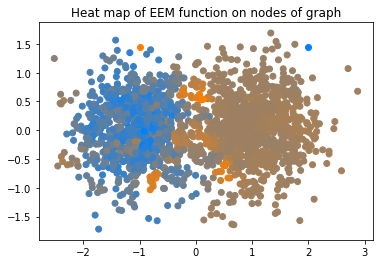

In [37]:
plt.scatter(X[:,0],X[:,1], c=colors)
plt.scatter(2,1.45,c=[(0,0.5,1)])
plt.scatter(-1,1.45, c= [(1,0.5,0)])
plt.title('Heat map of EEM function on nodes of graph')
plt.show()

# V-Opt and $\Sigma$-Opt Functions
$$
\begin{align}
    \min_{k \in \mathcal{U}} \mathcal{R}^{V}(\mathcal{L} \cup \{k\}) &\iff \max_{k \in \mathcal{U}} \frac{\sigma_k^2}{\gamma^2 + \sigma_k^2} \sum_{i=1}^N \rho_{ik}^2\sigma_i^2 = \frac{1}{\gamma^2 + C_{kk}} \sum_{i=1}^N C_{ki}^2\\
    \min_{k \in \mathcal{U}} \mathcal{R}^{\Sigma}(\mathcal{L} \cup \{k\}) &\iff \max_{k \in \mathcal{U}} \frac{\sigma_k^2}{\gamma^2 + \sigma_k^2}  \left( \sum_{i=1}^N\rho_{ik}\sigma_i\right)^2 = \frac{1}{\gamma^2 + C_{kk}} \left(\sum_{i=1}^N C_{ki}\right)^2
\end{align}
$$

In [38]:
def V_opt(C, unlabeled, gamma2):
    ips = np.array([np.inner(C[k,:], C[k,:]) for k in unlabeled]).flatten()
    v_opt = ips/(gamma2 + np.diag(C)[unlabeled])
    k_max = unlabeled[np.argmax(v_opt)]
    return k_max

def Sigma_opt(C, unlabeled, gamma2):
    sums = np.sum(C[unlabeled,:], axis=1)
    sums = np.asarray(sums).flatten()**2.
    s_opt = sums/(gamma2 + np.diag(C)[unlabeled])
    k_max = unlabeled[np.argmax(s_opt)]
    return k_max

In [39]:
%autoreload

In [40]:
# Batch update testing 
C_copy = C.copy()
C_copy2 = C.copy()
k_to_add = [45,171,801,901]
y_ks = [ground_truth[k] for k in k_to_add]
print(sorted(labeled))

m_new, C_new = calc_next_C_and_m_batch(m, C_copy, y, labeled, k_to_add, y_ks, gamma2)
m_new2 = calc_next_m_batch(m, C_copy2, y, labeled, k_to_add, y_ks, gamma2)
print(np.allclose(m_new, m_new2))

[6, 25, 29, 33, 43, 61, 62, 66, 76, 81, 86, 102, 103, 110, 115, 133, 139, 158, 163, 180, 188, 189, 190, 194, 200, 207, 218, 225, 235, 246, 250, 256, 269, 271, 273, 282, 288, 292, 296, 305, 322, 330, 335, 337, 349, 362, 374, 376, 378, 383, 401, 409, 436, 457, 468, 494, 502, 504, 516, 517, 523, 525, 532, 535, 538, 562, 586, 590, 593, 599, 607, 611, 633, 634, 645, 657, 691, 703, 707, 710, 731, 734, 750, 754, 759, 785, 800, 826, 849, 861, 865, 875, 898, 911, 941, 943, 944, 955, 973, 994]
True


In [41]:
bs = 5
iters = 13
print(iters % bs)

3


In [42]:
mod = iters % bs
if mod != 0:
    iters += (bs - mod)
print(iters % bs)

0


In [43]:
%autoreload

## Comparison of All Methods

In [44]:
tau, alpha, gamma = 0.001, 1.0, 0.001
gamma2 = gamma**2.
verbose = False     # set to True if want to see visual of which points chosen
num_iters = 10
batch_size = 5
tag2 = (tau, alpha, gamma2)

In [45]:
# Active Learning - Sigma_opt
fid = copy.deepcopy(fid_orig)
method = 'S'
test_opts = (batch_size, num_iters, verbose)

tic = time.clock()
ERRS_S, M_S = run_test_AL_VS(X, v, w, fid, ground_truth, method, tag2, test_opts)
toc = time.clock()
time_S = toc - tic

if verbose:
    print(ERRS_S)

In [46]:
# Active Learning - V_opt
fid = copy.deepcopy(fid_orig)
method = 'V'
test_opts = (batch_size, num_iters, verbose)

tic = time.clock()
ERRS_V, M_V = run_test_AL_VS(X, v, w, fid, ground_truth, method, tag2, test_opts)
toc = time.clock()
time_V = toc - tic

if verbose:
    print(ERRS_V)

In [47]:
# Active Learning Choices -- EEM 
fid = copy.deepcopy(fid_orig)
test_opts = (num_iters, verbose)

tic = time.clock()
ERRS, M = run_test_AL(X, v, w, fid, ground_truth, tag2, test_opts)
toc = time.clock()
time_EEM = toc - tic

if verbose:
    print(ERRS)

In [48]:
# random choices
fid = copy.deepcopy(fid_orig)

test_opts = (num_iters, verbose)
tic = time.clock()
ERRS_rand, M_rand = run_test_rand(X, v, w, fid, ground_truth, tag2, test_opts)
toc = time.clock()
time_rand = toc - tic

if verbose:
    print(ERRS_rand)

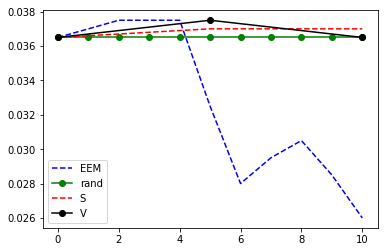

In [49]:
colors = ['y', 'r', 'k', 'g']
num_batches = int(num_iters/batch_size)
ids, errs = zip(*ERRS)
ids_rand, errs_rand = zip(*ERRS_rand)
ids_S, errs_S = zip(*ERRS_S)
ids_V, errs_V = zip(*ERRS_V)
plt.figure()
plt.plot([i for i in range(num_iters+1)], errs, 'b--', label='EEM')
plt.plot([i for i in range(num_iters+1)], errs_rand, 'g-o', label='rand')
plt.plot([i*batch_size for i in range(num_batches+1)], errs_S, 'r--', label='S')
plt.plot([i*batch_size for i in range(num_batches+1)], errs_V, 'k-o', label='V')
plt.legend()

In [50]:
times = [time_EEM, time_rand, time_S, time_V]
print(times)

[44.72723, 1.1449360000000013, 1.3385280000000037, 1.2457799999999963]
